In [21]:
# helper to load data from PNG image files
import imageio.v3
# glob helps select multiple files using patterns
import glob
import numpy as np
from natsort import natsorted
import os
import cv2
import matplotlib.pyplot

In [12]:



output_folder = 'resized_images/train/'

# Erstelle den Ausgabeordner, falls er noch nicht existiert
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

images_path = "../02_data_crop/train/"
images_numbers = sorted(os.listdir(images_path), key=lambda x: int(x))
print(images_numbers)


for folder in natsorted(os.listdir(images_path)):

    for file in os.listdir(os.path.join(images_path, folder)):
        output_ff = os.path.join(folder, file)
        image_path = os.path.join(images_path, output_ff)

        image = cv2.imread(image_path)

        # Ändere die Größe des Bildes auf 28x28 Pixel
        resized_image = cv2.resize(image, (28, 28))

        # Konvertiere das Bild in Graustufen
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Speichere das neue Bild im Ausgabeordner mit dem gleichen Dateinamen
        output_path = os.path.join(output_folder, output_ff)
        cv2.imwrite(output_path, gray_image)


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']


In [20]:
# our own image test data set
own_dataset = []
images_path = './resized_images/train/'

for folder in natsorted(os.listdir(images_path)): # for folder in train
    label = int(folder)   # 1,2,3,4 ...

    for file in os.listdir(os.path.join(images_path, folder)): # for file in train/1
        path = os.path.join(images_path, folder, file)

        # load image data from png files into an array
        img_array = imageio.v3.imread(path, mode='F')
        

        # reshape from 28x28 to list of 784 values, invert values
        img_data  = 255.0 - img_array.reshape(784)

        # then scale data to range from 0.01 to 1.0
        img_data = (img_data / 255.0 * 0.99) + 0.01

        # append label and image data  to test data set
        record = np.append(label,img_data)

        own_dataset.append(record)
        pass


./resized_images/train/1\a_00001.jpg
./resized_images/train/1\a_00002.jpg
./resized_images/train/1\a_00003.jpg
./resized_images/train/1\a_00004.jpg
./resized_images/train/1\a_00005.jpg
./resized_images/train/1\a_00006.jpg
./resized_images/train/1\a_00007.jpg
./resized_images/train/1\a_00008.jpg
./resized_images/train/1\a_00009.jpg
./resized_images/train/1\a_00010.jpg
./resized_images/train/1\a_00011.jpg
./resized_images/train/1\a_00012.jpg
./resized_images/train/1\a_00013.jpg
./resized_images/train/1\a_00014.jpg
./resized_images/train/1\a_00015.jpg
./resized_images/train/1\a_00016.jpg
./resized_images/train/1\a_00017.jpg
./resized_images/train/1\a_00018.jpg
./resized_images/train/1\a_00019.jpg
./resized_images/train/1\a_00020.jpg
./resized_images/train/1\a_00021.jpg
./resized_images/train/1\a_00022.jpg
./resized_images/train/1\a_00023.jpg
./resized_images/train/1\a_00024.jpg
./resized_images/train/1\a_00025.jpg
./resized_images/train/1\a_00026.jpg
./resized_images/train/1\a_00027.jpg
.

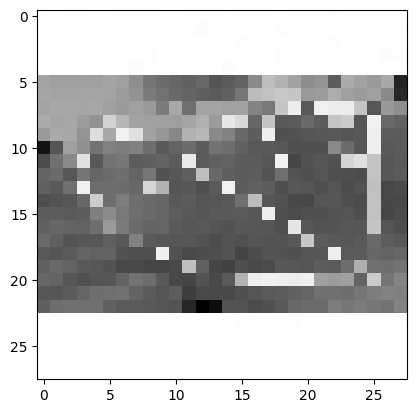

In [22]:
matplotlib.pyplot.imshow(own_dataset[0][1:].reshape(28,28), cmap='Greys', interpolation='None')

In [23]:
print(own_dataset[0])

[1.         0.01       0.01776471 0.01       0.01       0.01776471
 0.01388235 0.01       0.01       0.01       0.01388235 0.01388235
 0.01       0.01       0.01       0.01388235 0.01       0.01
 0.01       0.01388235 0.01       0.01       0.01       0.02552941
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01388235
 0.01       0.01388235 0.01388235 0.01       0.01776471 0.02941176
 0.01       0.01       0.01       0.01388235 0.01       0.02164706
 0.01       0.01       0.01       0.01       0.01776471 0.01776471
 0.01388235 0.01       0.01776471 0.01388235 0.01       0.01388235
 0.01388235 0.01       0.01388235 0.02164706 0.01       0.01
 0.01       0.01388235 0.01       0.01       0.01       0.01
 0.02164706 0.01       0.01776471 0.01       0.01776471 0.01776471
 0.01776471 0.02164706 0.01       0.01776471 0.01       0.01
 0.01       0.01388235 0.01       0.01       0.01388235 0.01
 0.01       0.01       0.01    